In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder


In [17]:
limit_rows   = 7000000
train           = pd.read_csv("train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)


/var/folders/q2/2f_m0ps1203czxrzbgwn59h80000gn/T/ipykernel_23978/3775245202.py:2: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  train           = pd.read_csv("train_ver2.csv",dtype={"sexo":str,


In [18]:
train.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [19]:
train.columns = ['Status_Dt', 'Cust_ID', 'Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Age', 'Join_Dt',
                'Is_New_Cust', 'Cust_Since', 'Relship_Status','Lst_Dt_Primary_Cust', 'Cust_Type_Mth_Beg', 
                'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner', 'Is_Spouse_Emp', 'Join_Channel', 'Deceased_Flg', 
                'Address_Type', 'Cust_Province_Cd', 'Cust_Province_Name', 'Cust_Active_Status', 'Gross_HHLD_Income',
                'Cust_Segment', 'Savings_Acct', 'Guarantees', 'Cur_Acct', 'Derivative_Acct', 'Payroll_Acct',
                'Junior_Acct', 'Mas_Particular_Acct', 'Particular_Acct', 'Particular_Plus_Acct', 'Short_Term_Deposits',
                'Med_Term_Deposits', 'Long_Term_Deposits', 'e-Acct', 'Funds', 'Mortgage', 'Pension1', 'Loans',
                'Taxes', 'Credit_Card', 'Securities', 'Home_Acct', 'Payroll', 'Pension2', 'Direct_Debit']

In [20]:
train.describe()

,Cust_ID,Relship_Status,Address_Type,Cust_Province_Cd,Cust_Active_Status,Gross_HHLD_Income,Savings_Acct,Guarantees,Cur_Acct,Derivative_Acct,...,Mortgage,Pension1,Loans,Taxes,Credit_Card,Securities,Home_Acct,Payroll,Pension2,Direct_Debit
count,7.000000e+06,6.972266e+06,6972266.0,6.935910e+06,6.972266e+06,5.747744e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,6.983937e+06,6.983937e+06,7.000000e+06
mean,8.054542e+05,1.153924e+00,1.0,2.657354e+01,4.899850e-01,1.342445e+05,1.187143e-04,2.742857e-05,7.032481e-01,4.322857e-04,...,6.750571e-03,1.035714e-02,2.923143e-03,5.629843e-02,4.993400e-02,2.796743e-02,4.389000e-03,5.948292e-02,6.457375e-02,1.367439e-01
std,4.220713e+05,3.880831e+00,0.0,1.274787e+01,4.998997e-01,2.293811e+05,1.089496e-02,5.237158e-03,4.568262e-01,2.078699e-02,...,8.188408e-02,1.012417e-01,5.398702e-02,2.304971e-01,2.178086e-01,1.648795e-01,6.610399e-02,2.365264e-01,2.457722e-01,3.435768e-01
min,1.588900e+04,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.206390e+05,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.877797e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.228030e+05,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.019684e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.169640e+06,1.000000e+00,1.0,3.400000e+01,1.000000e+00,1.561560e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.495489e+06,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Correlation Matrix - 

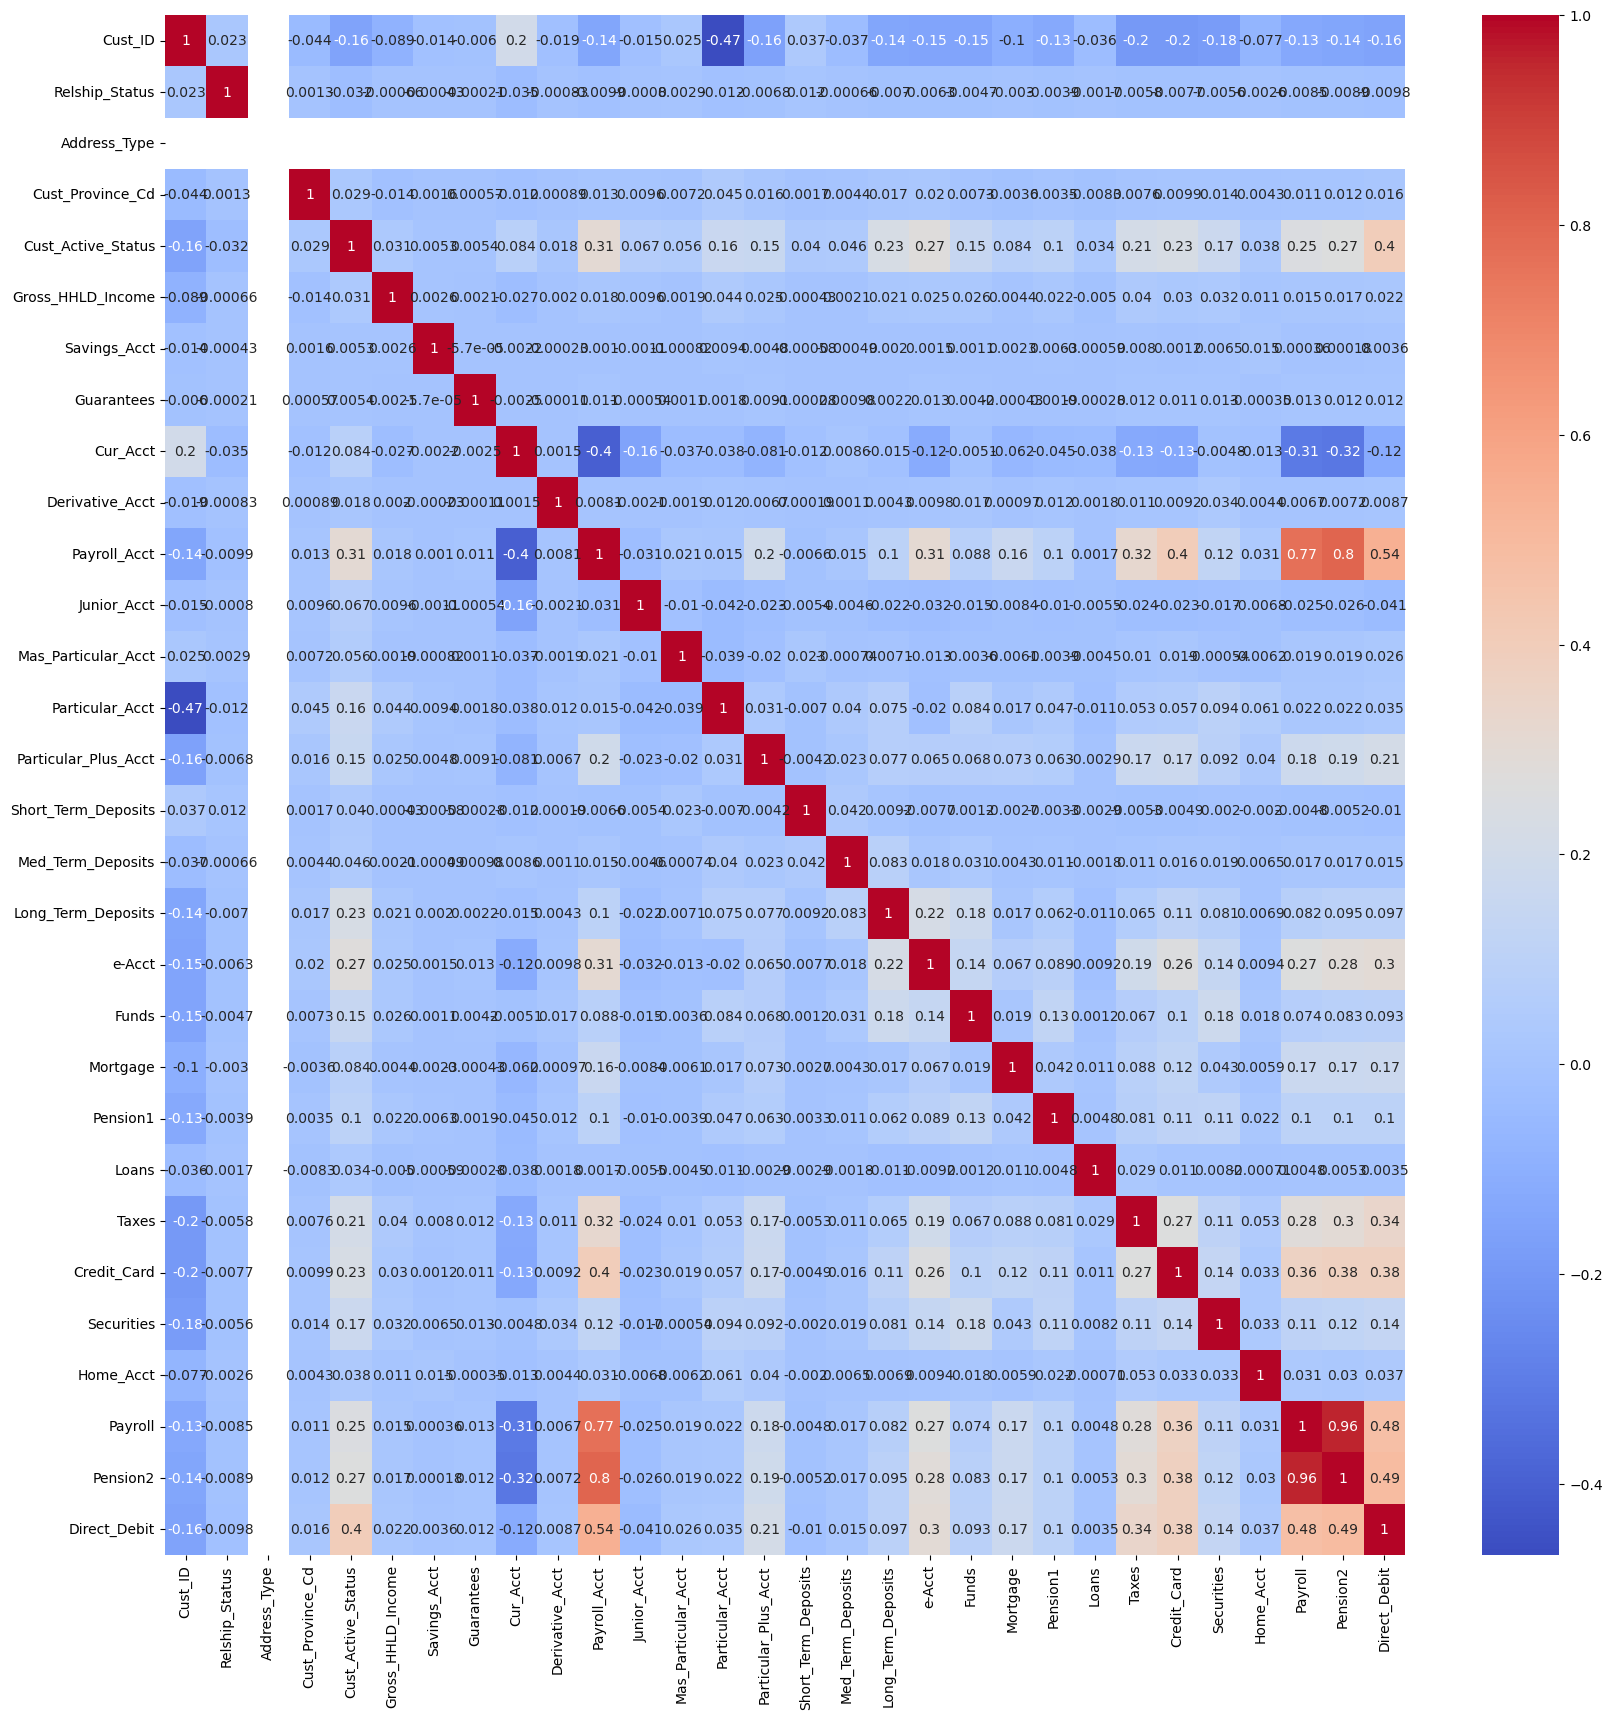

In [21]:
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [22]:
train = train.drop(['Pension2'], axis = 1)

## Convert DataTypes

In [23]:
train["Age"]   = pd.to_numeric(train["Age"], errors="coerce")
train["Cust_Since"]   = pd.to_numeric(train["Cust_Since"], errors="coerce")
train["Gross_HHLD_Income"]   = pd.to_numeric(train["Gross_HHLD_Income"], errors="coerce")


## Checking for Missing Values

In [24]:
train.isnull().mean() * 100


Status_Dt                     0.000000
Cust_ID                       0.000000
Emp_Status                    0.396200
Cust_Ctry                     0.396200
Cust_Sex                      0.396686
Age                           0.396200
Join_Dt                       0.396200
Is_New_Cust                   0.396200
Cust_Since                    0.396200
Relship_Status                0.396200
Lst_Dt_Primary_Cust          99.843557
Cust_Type_Mth_Beg             1.497200
Cust_Relship_Type_Mth_Beg     1.497200
Residence_Ctry                0.396200
Is_Foreigner                  0.396200
Is_Spouse_Emp                99.985743
Join_Channel                  1.703600
Deceased_Flg                  0.396200
Address_Type                  0.396200
Cust_Province_Cd              0.915571
Cust_Province_Name            0.915571
Cust_Active_Status            0.396200
Gross_HHLD_Income            17.889371
Cust_Segment                  1.718914
Savings_Acct                  0.000000
Guarantees               

In [25]:
train['Is_New_Cust'] = train['Is_New_Cust'].fillna(1)

median = train['Gross_HHLD_Income'].median()
train['Gross_HHLD_Income'] = train['Gross_HHLD_Income'].fillna(median)

#99%
train.drop(columns=['Lst_Dt_Primary_Cust','Is_Spouse_Emp'], inplace=True)
train.drop(columns=['Cust_Ctry'], inplace=True)

train['Payroll'] = train['Payroll'].fillna(0)

#A is the most frequent category


train = train.dropna(subset = ['Cust_Type_Mth_Beg', 'Cust_Relship_Type_Mth_Beg' , 'Cust_Province_Name', 'Cust_Province_Cd', 'Join_Channel', 'Cust_Segment', 'Cust_Sex'])



In [26]:
train.isnull().mean() * 100


Status_Dt                    0.0
Cust_ID                      0.0
Emp_Status                   0.0
Cust_Sex                     0.0
Age                          0.0
Join_Dt                      0.0
Is_New_Cust                  0.0
Cust_Since                   0.0
Relship_Status               0.0
Cust_Type_Mth_Beg            0.0
Cust_Relship_Type_Mth_Beg    0.0
Residence_Ctry               0.0
Is_Foreigner                 0.0
Join_Channel                 0.0
Deceased_Flg                 0.0
Address_Type                 0.0
Cust_Province_Cd             0.0
Cust_Province_Name           0.0
Cust_Active_Status           0.0
Gross_HHLD_Income            0.0
Cust_Segment                 0.0
Savings_Acct                 0.0
Guarantees                   0.0
Cur_Acct                     0.0
Derivative_Acct              0.0
Payroll_Acct                 0.0
Junior_Acct                  0.0
Mas_Particular_Acct          0.0
Particular_Acct              0.0
Particular_Plus_Acct         0.0
Short_Term

### Cateogorical Encoding of Variables

In [27]:
#Categorical Encoding:
oe = OrdinalEncoder()
features = ['Cust_Sex', 'Join_Channel', 'Cust_Segment', 'Cust_Province_Cd']
train[features] = oe.fit_transform(train[features])
print(train)


          Status_Dt  Cust_ID Emp_Status  Cust_Sex   Age     Join_Dt  \
0        2015-01-28  1375586          N       0.0  35.0  2015-01-12   
1        2015-01-28  1050611          N       1.0  23.0  2012-08-10   
2        2015-01-28  1050612          N       1.0  23.0  2012-08-10   
3        2015-01-28  1050613          N       0.0  22.0  2012-08-10   
4        2015-01-28  1050614          N       1.0  23.0  2012-08-10   
...             ...      ...        ...       ...   ...         ...   
6999995  2015-10-28   830262          N       1.0  28.0  2009-01-30   
6999996  2015-10-28   830264          N       1.0  47.0  2010-04-28   
6999997  2015-10-28   830266          N       1.0  73.0  2009-01-30   
6999998  2015-10-28   830268          N       1.0  50.0  2009-01-30   
6999999  2015-10-28   830269          N       1.0   8.0  2009-01-30   

        Is_New_Cust  Cust_Since  Relship_Status Cust_Type_Mth_Beg  ... Funds  \
0                 0         6.0             1.0               1.0  

## Graphs and distribution

### Visualising the distribution of each product by age by boxplot¶


/Users/sanmatichoudhary/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='train age'>

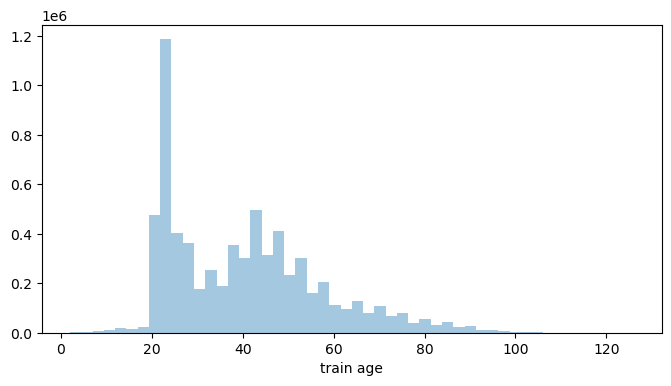

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

sns.distplot(train.Age[(train.Age>=0) & (train.Age<=130)], kde=False, ax=axes, axlabel='train age')


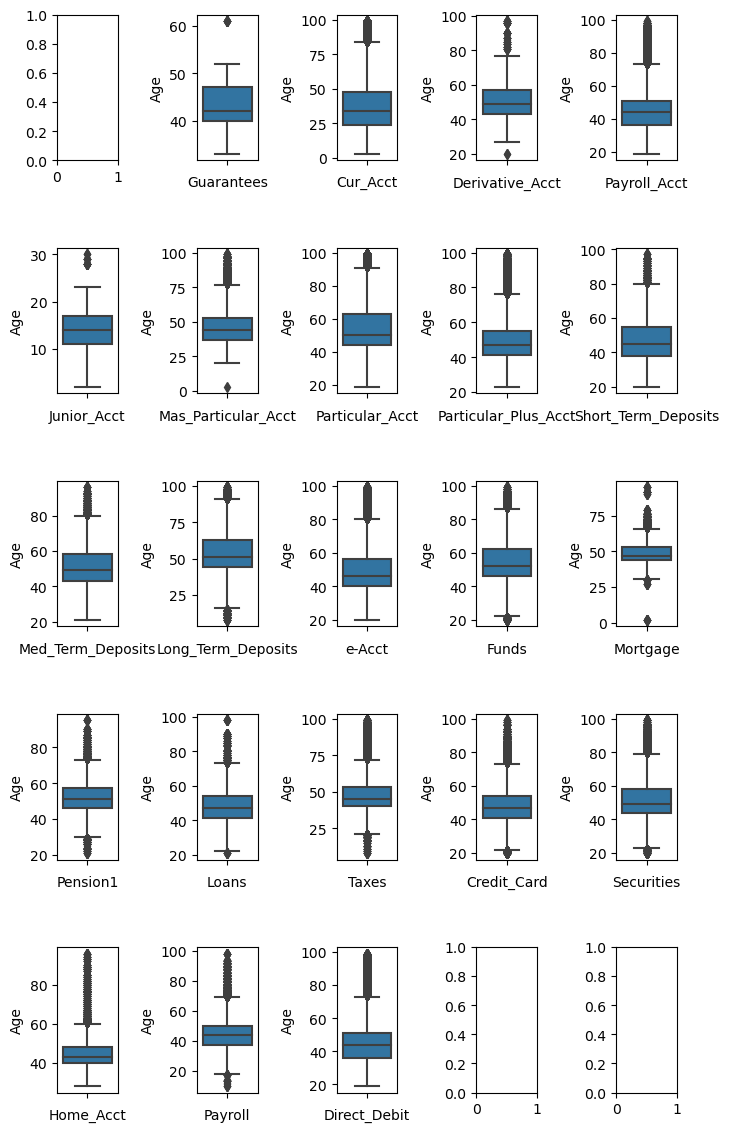

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8,14))
plt.subplots_adjust(wspace=1.3, hspace=0.6)
fig_row=0
for col_id in range(22, 44):
    ax_id=col_id-22
    fig_label=train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=(col_id-1)%5
    box_plot=sns.boxplot(y='Age', data=train[(train[feat]==1) &
    (train['Age']>0) & (train['Age']<100)], ax=axes[fig_row][fig_col])
    box_plot.set(xlabel=fig_label)
    if fig_col==4: fig_row+=1

### Distribution of product by Cod_prov¶


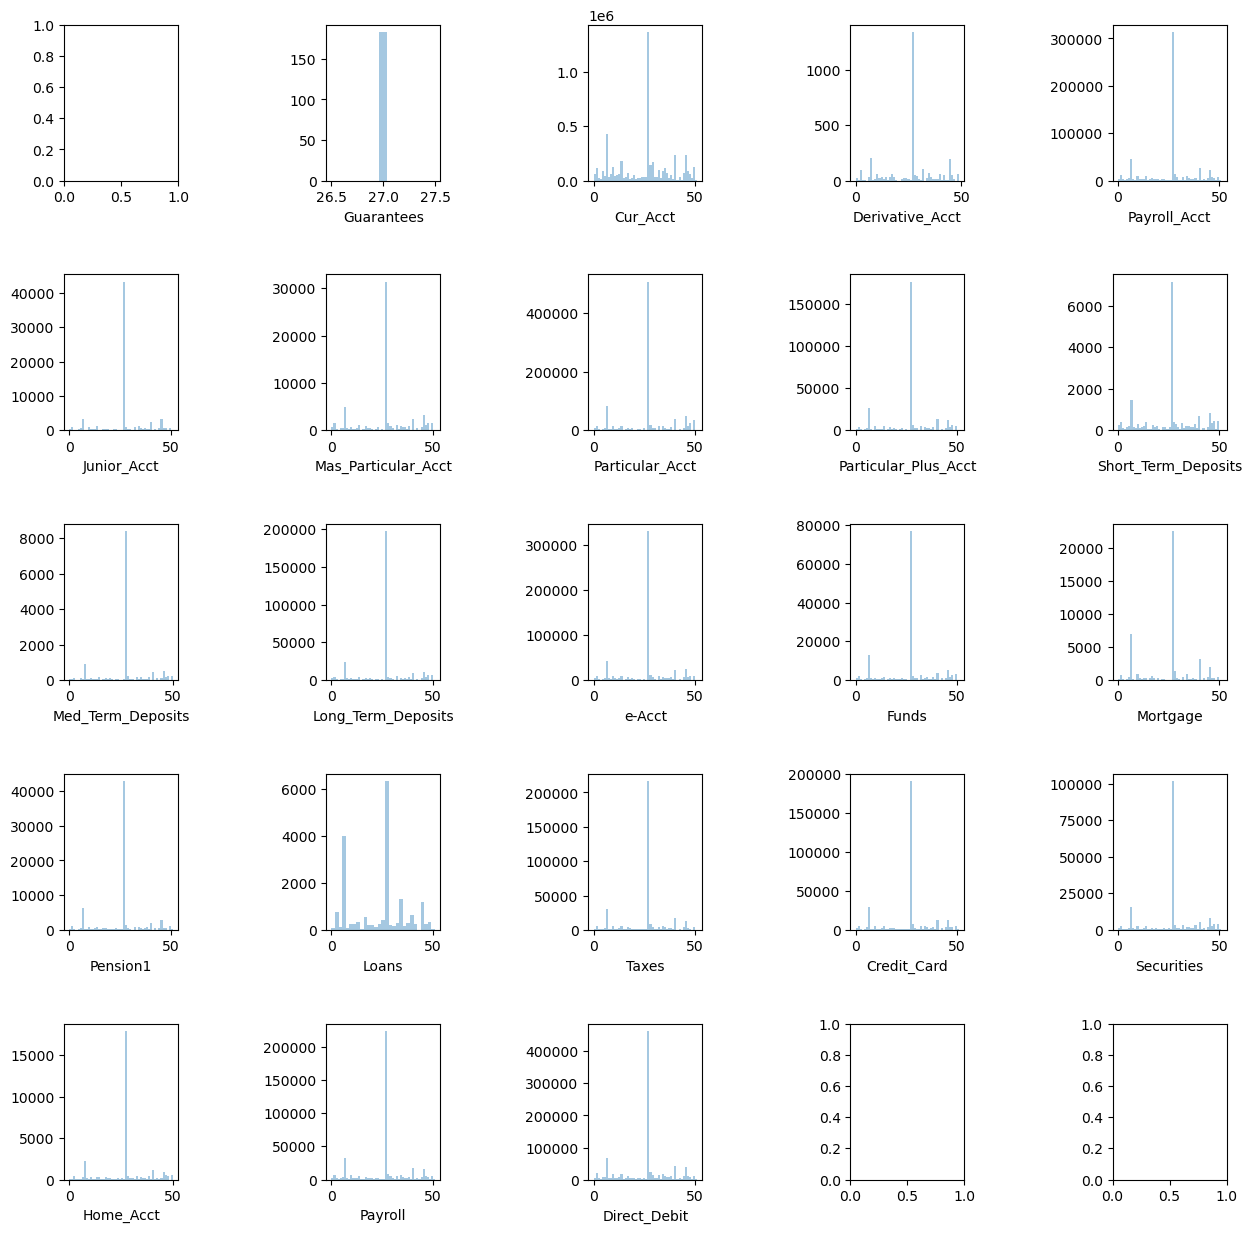

In [39]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,15))
plt.subplots_adjust(wspace=1.3, hspace=0.6)
fig_row=0
for col_id in range(22, 44):
    ax_id=col_id-22
    fig_label=train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=(col_id-1)%5
    sns.distplot(train.Cust_Province_Cd[(train[feat]==1) & (train['Cust_Province_Cd']>=0)], kde=False, 
                 axlabel=fig_label, ax=axes[fig_row][fig_col])   
    if fig_col==4: fig_row+=1


### Distribution of product among different genders¶


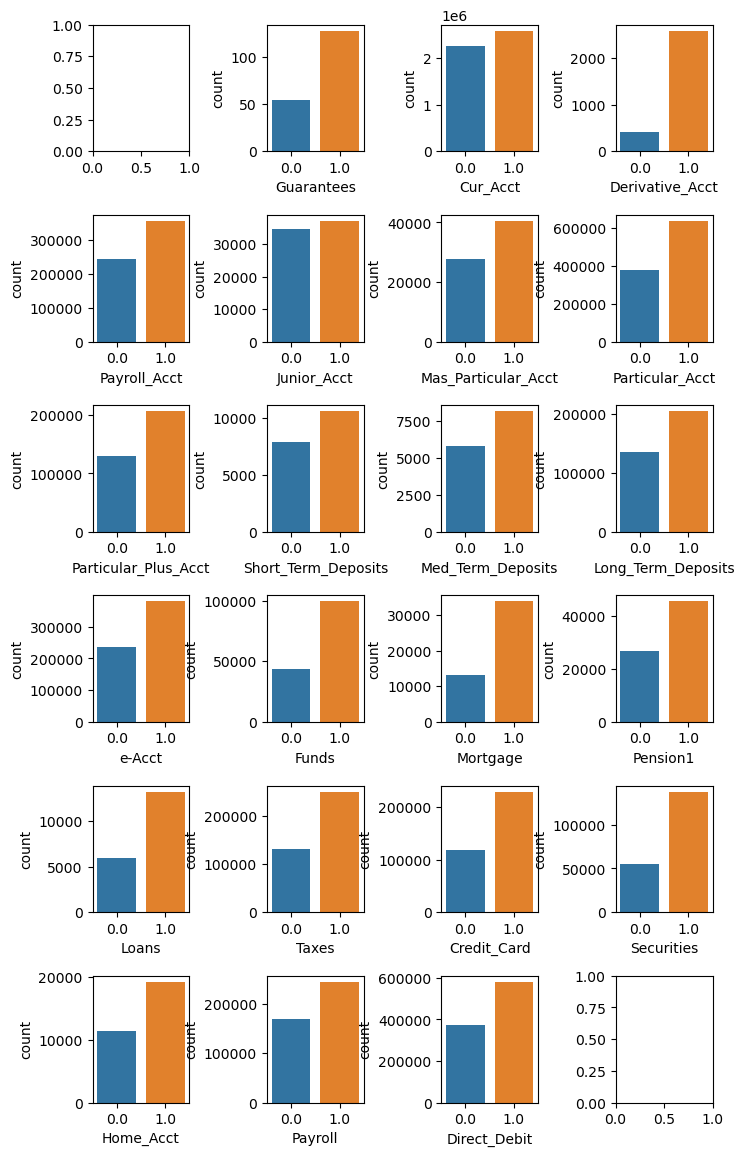

In [34]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(8,14))
plt.subplots_adjust(wspace=0.8, hspace=0.5)
# fig.tight_layout()
fig_row=0
for col_id in range(22, 44):
    ax_id=col_id-22
    fig_label= train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=(col_id-1)%4
    countplot=sns.countplot(x='Cust_Sex', data=train[(train[feat]==1) & (train['Cust_Sex']>=0)],ax=axes[fig_row][fig_col])
    countplot.set(xlabel=fig_label)
    if fig_col==3: fig_row+=1
        

### Transform Test Data

In [32]:
limit_rows   = 7000000

test = pd.read_csv("train_ver2.csv",dtype={"sexo":str,
                                             "ind_nuevo":str,
                                               "ult_fec_cli_1t":str,
                                                "indext":str}, nrows=limit_rows)

/var/folders/q2/2f_m0ps1203czxrzbgwn59h80000gn/T/ipykernel_23978/316285499.py:3: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("train_ver2.csv",dtype={"sexo":str,


In [ ]:
test.columns = ['Status_Dt', 'Cust_ID', 'Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Age', 'Join_Dt',
                'Is_New_Cust', 'Cust_Since', 'Relship_Status','Lst_Dt_Primary_Cust', 'Cust_Type_Mth_Beg', 
                'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner', 'Is_Spouse_Emp', 'Join_Channel', 'Deceased_Flg', 
                'Address_Type', 'Cust_Province_Cd', 'Cust_Province_Name', 'Cust_Active_Status', 'Gross_HHLD_Income',
                'Cust_Segment', 'Savings_Acct', 'Guarantees', 'Cur_Acct', 'Derivative_Acct', 'Payroll_Acct',
                'Junior_Acct', 'Mas_Particular_Acct', 'Particular_Acct', 'Particular_Plus_Acct', 'Short_Term_Deposits',
                'Med_Term_Deposits', 'Long_Term_Deposits', 'e-Acct', 'Funds', 'Mortgage', 'Pension1', 'Loans',
                'Taxes', 'Credit_Card', 'Securities', 'Home_Acct', 'Payroll', 'Pension2', 'Direct_Debit']

In [ ]:
test = test.drop(['Pension2'], axis = 1)

In [ ]:
test["Age"] = pd.to_numeric(test["Age"], errors="coerce")
test["Cust_Since"] = pd.to_numeric(test["Cust_Since"], errors="coerce")
test["Gross_HHLD_Income"] = pd.to_numeric(test["Gross_HHLD_Income"], errors="coerce")


In [ ]:
test['Is_New_Cust'] = test['Is_New_Cust'].fillna(1)

median = test['Gross_HHLD_Income'].median()
test['Gross_HHLD_Income'] = test['Gross_HHLD_Income'].fillna(median)

#99%
test.drop(columns=['Lst_Dt_Primary_Cust','Is_Spouse_Emp'], inplace=True)
test.drop(columns=['Cust_Ctry'], inplace=True)

test['Payroll'] = test['Payroll'].fillna(0)

#A is the most frequent category

test = test.dropna(subset = ['Cust_Type_Mth_Beg', 'Cust_Relship_Type_Mth_Beg' , 'Cust_Province_Name', 'Cust_Province_Cd', 'Join_Channel', 'Cust_Segment', 'Cust_Sex'])

In [ ]:
test.isnull().mean() * 100


In [ ]:
#Categorical Encoding:
oe = OrdinalEncoder()
features = ['Cust_Sex', 'Join_Channel', 'Cust_Segment', 'Cust_Province_Cd']
test = oe.fit_transform(test[features])

In [ ]:
train.shape

In [ ]:
#Get rid of the ages 30 and 40 - stratify 

In [ ]:
#todo - fix the test data 


In [ ]:
#map to english transaltion

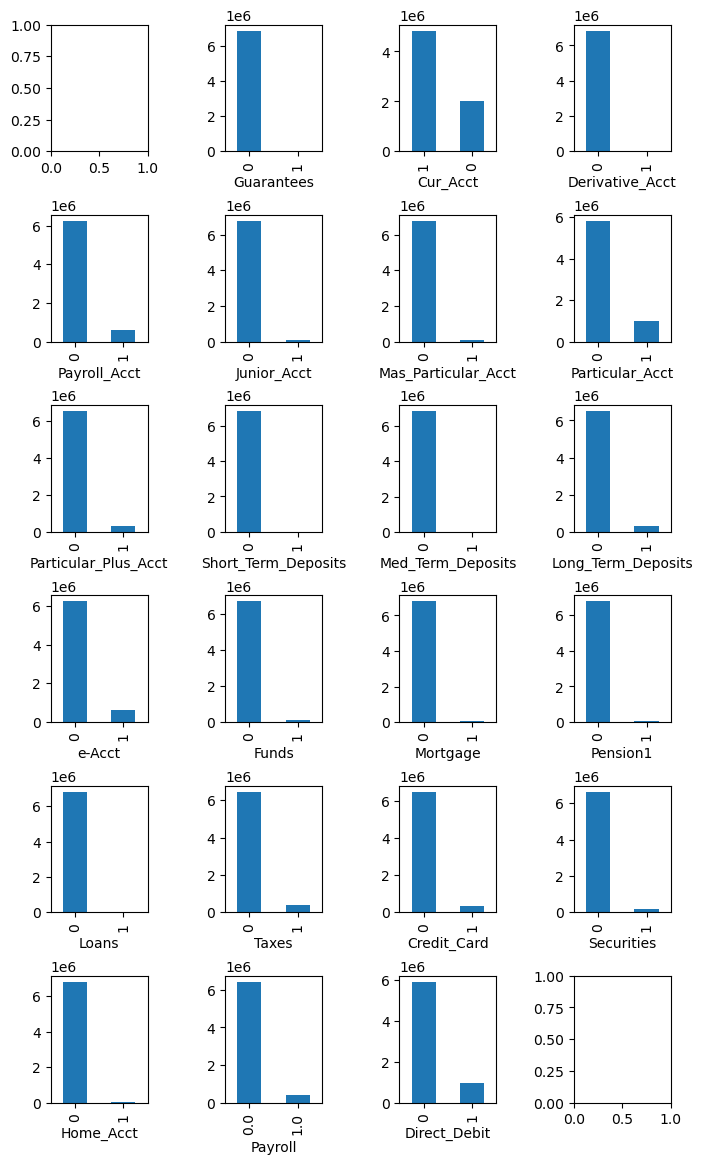

In [69]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(8,14))
plt.subplots_adjust(wspace=0.8, hspace=0.5)
fig_row=0
for col_id in range(22, 44):
    ax_id=col_id-22
    fig_label= train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=(col_id-1)%4
    value_counts = train.iloc[:, col_id].value_counts()
    value_counts.plot(kind='bar', ax = axes[fig_row, fig_col])
    axes[fig_row, fig_col].set_xlabel(fig_label)
    if fig_col==3: fig_row+=1
        
plt.show()

        
# for col_id in range(22, 44):
#     x = train.columns[col_id]
#     print(train[x].value_counts())
    